<a href="https://colab.research.google.com/github/Minakshi654/Sharing-notes/blob/main/All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv('Act3.csv', header =0)
df= df.dropna()

In [ ]:
#df.set_index('Period', inplace=True)
final_df = df[['Value']]
final_df = final_df.dropna()

In [ ]:
train_size = int(len(final_df.Value) * 0.8)
train, test = final_df.iloc[:train_size], final_df.iloc[train_size:]
history = [x for x in train]
predictions = list()

In [ ]:
model = ExponentialSmoothing(final_df, trend='add', seasonal=None)
fit = model.fit()
predictions = fit.forecast(len(test))
mse = mean_squared_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Mean Squared Error: {mse:.2f}')
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 236621382087628.62
Test RMSE: 15382502.465


In [ ]:
model = ARIMA(final_df.astype(float), order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(len(test))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                10847
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -198431.932
Date:                Mon, 01 May 2023   AIC                         396875.864
Time:                        09:57:30   BIC                         396919.614
Sample:                             0   HQIC                        396890.614
                              - 10847                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8402      0.002   -523.999      0.000      -0.843      -0.837
ar.L2         -0.6762      0.002   -339.051      0.000      -0.680      -0.672
ar.L3         -0.5098      0.002   -244.256      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Streaming output truncated to the last 5000 lines.
predicted=-96308.143482, expected=100966.050000
predicted=-103186.314648, expected=22830.210000
predicted=-98713.493755, expected=245140.150000
predicted=-110550.012489, expected=74150.150000
predicted=-103420.491829, expected=195129.480000
predicted=-110344.788937, expected=54278.100000
predicted=-107057.267585, expected=16094.180000
predicted=-97675.126462, expected=25814.920000
predicted=-99315.778761, expected=469482.010000
predicted=-114009.021088, expected=40794.810000
predicted=-101839.030270, expected=38214.860000
predicted=-100081.967536, expected=-1587302.300000
predicted=-43013.747394, expected=39135.180000
predicted=-95880.519457, expected=62011.380000
predicted=-98531.961338, expected=62759.460000
predicted=-101462.113968, expected=12293.910000
predicted=-107319.333443, expected=7583.450000
predicted=-94533.779133, expected=19370.490000
predicted=-90624.843483, expected=931.140000
predicted=-65603.288372, expected=30096.08

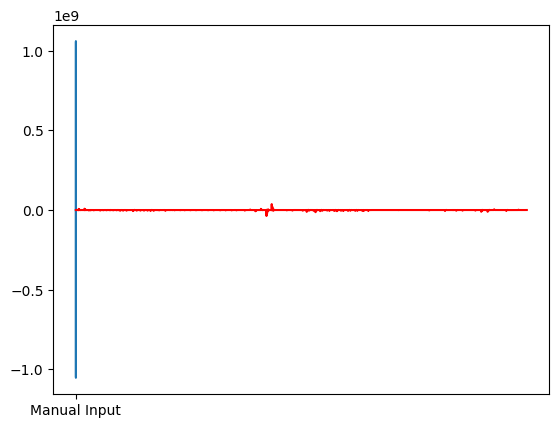

In [ ]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('PS_Actuals.csv', header=0, index_col=0)
# split dataset
series= series.dropna()
X = series.Value
train, test = X[1:len(X)-5000], X[len(X)-5000:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Mean Squared Error: 104490510260.31
Test RMSE: 323249.919


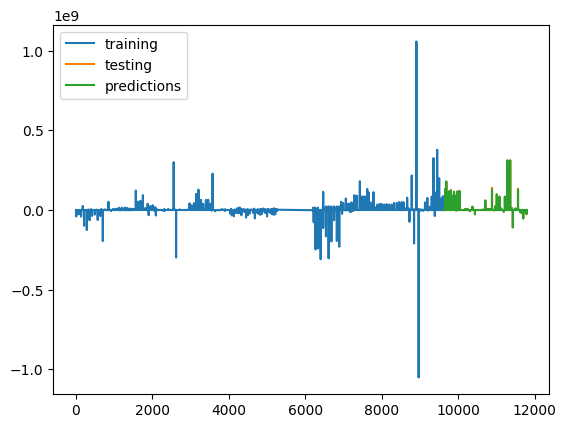

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# create a sample dataset
df = pd.read_csv('Act3.csv', header =0)
final_df = df.copy()
final_df = df[['Value']]
final_df = final_df.dropna()
# split the dataset into training and testing sets
train_size = int(len(final_df) * 0.8)
train, test = final_df.iloc[:train_size], final_df.iloc[train_size:]

# extract features from the dataset
def extract_features(final_df, lag=0):
    df_shifted = final_df.shift(lag)
    features = pd.concat([df_shifted, final_df], axis=1)
    features.columns = ['lag', 'Value']
    return features.dropna()

train_features = extract_features(train)
train_target = train['Value']
test_features = extract_features(test)
test_target = test['Value']

# train a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_features, train_target)

# make predictions for the testing set
predictions = model.predict(test_features)

# calculate the mean squared error
mse = mean_squared_error(test_target, predictions)
rmse = sqrt(mean_squared_error(test_target, predictions))
print(f'Mean Squared Error: {mse:.2f}')
print('Test RMSE: %.3f' % rmse)
# plot the results
plt.plot(train.index, train.values, label='training')
plt.plot(test.index, test.values, label='testing')
plt.plot(test.index, predictions, label='predictions')
plt.legend()
plt.show()


Parallel Processing

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.6s finished


Mean Squared Error: 118501663970.54
Test RMSE: 344240.706


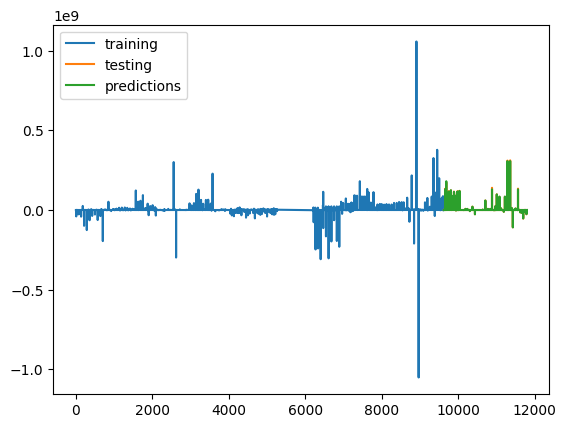

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed

# create a sample dataset
df = pd.read_csv('Act3.csv', header =0)
final_df = df.copy()
final_df = df[['Value']]
final_df = final_df.dropna()
# split the dataset into training and testing sets
train_size = int(len(final_df) * 0.8)
train, test = final_df.iloc[:train_size], final_df.iloc[train_size:]

# extract features from the dataset
def extract_features(df, lag=0):
    df_shifted = df.shift(lag)
    features = pd.concat([df_shifted, df], axis=1)
    features.columns = ['lag', 'Value']
    return features.dropna()

train_features = extract_features(train)
train_target = train['Value']
test_features = extract_features(test)
test_target = test['Value']

# train a random forest regression model using parallel processing
def train_model(train_features, train_target, n_estimators=100, random_state=42):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(train_features, train_target)
    return model

models = Parallel(n_jobs=-1, verbose=5)(
    delayed(train_model)(train_features, train_target, n_estimators=100, random_state=i) for i in range(10)
)

# make predictions for the testing set
predictions = np.mean([model.predict(test_features) for model in models], axis=0)

# calculate the mean squared error
mse = mean_squared_error(test_target, predictions)
rmse = sqrt(mean_squared_error(test_target, predictions))
print(f'Mean Squared Error: {mse:.2f}')
print('Test RMSE: %.3f' % rmse)

# plot the results
plt.plot(train.index, train.values, label='training')
plt.plot(test.index, test.values, label='testing')
plt.plot(test.index, predictions, label='predictions')
plt.legend()
plt.show()


Predicting the value of each value of data set based on training and testing split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('data.csv')

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2, random_state=42)

# train a machine learning model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# predict the values of the testing set
y_pred = model.predict(X_test)

# calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# predict the value of each data point in the dataset
all_predictions = model.predict(data[['feature1', 'feature2', 'feature3']])
data['predicted_target'] = all_predictions

# print the predicted values for each data point
print(data[['target', 'predicted_target']])


Divide dataset into multiple mini dataset. Train mini dataset with different ML models and test according. Predict the testing data's value.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the iris dataset
data = load_iris()

# split the dataset into mini datasets
mini_datasets = []
for i in range(4):
    mini_datasets.append(data.data[:, i:i+1])

# create training and testing sets for each mini dataset
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(mini_datasets[i], data.target, test_size=0.3, random_state=42)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# train and test different machine learning models on each mini dataset
models = [
    RandomForestClassifier(n_estimators=10, random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42)
]

for i in range(4):
    X_train = X_train_list[i]
    X_test = X_test_list[i]
    y_train = y_train_list[i]
    y_test = y_test_list[i]

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Model: {model.__class__.__name__}, Mini dataset: {i+1}, Accuracy: {acc:.2f}')

# predict the testing data's value
X_test = data.data
y_test = data.target
ensemble_predictions = []
for i in range(4):
    mini_dataset = mini_datasets[i]
    X_mini_test = mini_dataset.reshape(-1, 1)
    y_mini_pred = models[0].predict(X_mini_test)
    ensemble_predictions.append(y_mini_pred)
ensemble_predictions = np.mean(ensemble_predictions, axis=0)
acc = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {acc:.2f}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed

# create a sample dataset
dates = pd.date_range('2022-01-01', periods=24, freq='M')
values = [10, 12, 14, 18, 20, 22, 24, 26, 28, 30, 32, 34,
          36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58]
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)

# split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# extract features from the dataset
def extract_features(df, lag=1):
    df_shifted = df.shift(lag)
    features = pd.concat([df_shifted, df], axis=1)
    features.columns = ['lag', 'value']
    return features.dropna()

train_features = extract_features(train)
train_target = train['value']
test_features = extract_features(test)
test_target = test['value']

# train a random forest regression model using parallel processing
def train_model(train_features, train_target, n_estimators=100, random_state=42):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(train_features, train_target)
    return model

models = Parallel(n_jobs=-1, verbose=5)(
    delayed(train_model)(train_features, train_target, n_estimators=100, random_state=i) for i in range(10)
)

# make predictions for the testing set
predictions = np.mean([model.predict(test_features) for model in models], axis=0)

# calculate the mean squared error
mse = mean_squared_error(test_target, predictions)
print(f'Mean Squared Error: {mse:.2f}')

# plot the results
plt.plot(train.index, train.values, label='training')
plt.plot(test.index, test.values, label='testing')
plt.plot(test.index, predictions, label='predictions')
plt.legend()
plt.show()
features = extract_features(df)
target = df['value']

CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('data.csv')

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2, random_state=42)

# reshape the input data for the CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

# train the CNN model on the training set
model.fit(X_train, y_train, epochs=100, verbose=0)

# predict the values of the testing set
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

# calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# reshape the input data for predicting the values of the entire dataset
data_array = np.array(data[['feature1', 'feature2', 'feature3']])
data_array = np.expand_dims(data_array, axis=2)

# predict the value of each data point in the dataset
all_predictions = model.predict(data_array)
all_predictions = all_predictions.flatten()

# add the predicted values to the dataset
data['predicted_target'] = all_predictions

# print the predicted values for each data point
print(data[['target', 'predicted_target']])


LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('data.csv')

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2, random_state=42)

# reshape the input data for the LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# train the LSTM model on the training set
model.fit(X_train, y_train, epochs=100, verbose=0)

# predict the values of the testing set
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

# calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# reshape the input data for predicting the values of the entire dataset
data_array = np.reshape(data[['feature1', 'feature2', 'feature3']].values, (data.shape[0], 3, 1))

# predict the value of each data point in the dataset
all_predictions = model.predict(data_array)
all_predictions = all_predictions.flatten()

# add the predicted values to the dataset
data['predicted_target'] = all_predictions

# print the predicted values for each data point
print(data[['target', 'predicted_target']])


MLPS Model

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import pandas as pd

# load the dataset
data = pd.read_csv('data.csv')

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2, random_state=42)

# build the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# train the MLP model on the training set
model.fit(X_train, y_train)

# predict the values of the testing set
y_pred = model.predict(X_test)

# calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# predict the value of each data point in the dataset
all_predictions = model.predict(data[['feature1', 'feature2', 'feature3']])
data['predicted_target'] = all_predictions

# print the predicted values for each data point
print(data[['target', 'predicted_target']])


New Task

In [ ]:
import pandas as pd

data = pd.read_csv('historical_data.csv')
current_year_data = pd.read_csv('current_year_data.csv')
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2)

# Concatenate the current year's data to the historical data
data = pd.concat([data, current_year_data], ignore_index=True)
data = data.fillna(method='ffill') # fill missing values with previous value
model_fit = model.fit(disp=0)
future_predictions = model_fit.forecast(steps=12) # forecast the next 12 months

